# Set Up and Pre-Processing

## Libraries

In [ ]:
!pip install dmba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install termcolor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp
import scipy.stats as stats
import math
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import missingno as mno
from statsmodels.stats.outliers_influence import variance_inflation_factor
import plotly.express as px
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder, Normalizer
import scipy.special
import scipy.stats as stats
from scipy.stats import skew, kurtosis, shapiro
import dmba
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score
from termcolor import colored
sns.set()

no display found. Using non-interactive Agg backend


## Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ADS-505-F22-Applied-Data-Sci-for-Biz/Final_Team_Project/main/Bank%20Customer%20Churn%20Prediction.csv')

## Intial Peek into Data

In [ ]:
df.shape

#10,000 rows and 12 columns

(10000, 12)

In [ ]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.describe(include = 'all')

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


## Dropping Irrelevant Columns (Pre-EDA)

In [ ]:
df = df.drop(['customer_id'], axis=1)

# Customer ID doesn't teach us anything and, in fact, will lead to overfitting

## Handling Nulls

In [ ]:
print(f'\nMissing Data:\n{df.isnull().sum()}')

print('\nTotal Missing Data:', df.isnull().sum().sum())


Missing Data:
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

Total Missing Data: 0


## Checking for Duplicates

In [ ]:
df.duplicated().sum()

0

## Update Data Types

In [ ]:
df.dtypes

#Credit Score is rightfully numeric
#Country is rightfully categorical
#Gender is rightfully categorical
#Age is rightfully numeric
#Tenure is rightfully numeric
#Balance is rightfully numeric
#Products_number is rightfully numeric
#Credit_card is boolean
#Active_member is boolean
#Estimated salary is rightfully numeric
#Churn is boolean

credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [ ]:
df['credit_card'] = df['credit_card'].astype('bool')
df['active_member'] = df['active_member'].astype('bool')
df['churn'] = df['churn'].astype('bool')

## Checking for Outliers

In [ ]:
df_num = df.select_dtypes(include='number')
cols = df_num.columns

Q1 = df_num[cols].quantile(0.25)
Q3 = df_num[cols].quantile(0.75)
IQR = Q3 - Q1

df_nooutliers = df_num[~((df_num[cols] < (Q1 - 1.5 * IQR)) |
                           (df_num[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Number of Rows Not Outliers:", df_nooutliers.shape[0])

df_outliers = df_num[((df_num[cols] < (Q1 - 1.5 * IQR)) |
                        (df_num[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Number of Rows Outliers:", df_outliers.shape[0])

Number of Rows Not Outliers: 9568
Number of Rows Outliers: 432


In [ ]:
df_outliers.describe()


,credit_score,age,tenure,balance,products_number,estimated_salary
count,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,646.942130,65.189815,4.956019,77633.911713,1.844907,100002.868287
std,108.374785,10.801138,2.988829,62040.650326,1.017947,57299.780629
min,350.000000,28.000000,0.000000,0.000000,1.000000,502.700000
25%,586.750000,63.000000,2.000000,0.000000,1.000000,50654.832500
50%,652.000000,67.000000,5.000000,98807.015000,2.000000,102786.760000
75%,718.250000,71.000000,8.000000,128598.290000,2.000000,146654.085000
max,850.000000,92.000000,10.000000,195238.290000,4.000000,199493.380000


432 rows were identified as having outliers in them. That's less than 1 percent of the data.

Examining those that are flagged as outliers: 
- Credit Score ranges from 350 to 850.
- Age ranges from 28 to 92.
- Balance ranges from 0 to nearly 200,000.
- Products number ranges from 1 to 4. 
- Estimated salary ranges from 502 to 200,000.

All of those seem like reasonable values to me-- someone can have a credit score of 850, someone can be 92, someone can have a $0 balance, etc.

As a result, upon review, we will not remove or otherwise affect any outliers.

## Checking for Skew

In [ ]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


credit_score       -0.071607
age                 1.011320
tenure              0.010991
balance            -0.141109
products_number     0.745568
credit_card        -0.901812
active_member      -0.060437
estimated_salary    0.002085
churn               1.471611
dtype: float64

# EDA

## EDA: Numerical Variables

In [ ]:
df_num = df.select_dtypes(include='number')
num_vars = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

In [ ]:
df_num.describe()

,credit_score,age,tenure,balance,products_number,estimated_salary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [ ]:
for i, col in enumerate(df_num.columns):
    plt.figure(i)
    sns.histplot(df_num[col]);

Takeaways:
- Credit score is a little left skewed, but generally symetric. A few outliers on the uper end.
- Age is right skewed. Very few observations over 70.
- Tenure generally looks uniform except at the extremes.
- Balance generally looks normal and symetric, aside from the outlier amount of accounts with 0 balance.
- Products number is generally right skewed, with most people having 1-2 products and few people having 3-4.
- Estimated salary looks uniform.

## EDA: Categorical Variables

In [ ]:
df_cat = df.select_dtypes(exclude='number')
cat_vars = ['country', 'gender', 'credit_card', 'active_member']

In [ ]:
unique_values = df_cat.nunique()
print(unique_values)

country          3
gender           2
credit_card      2
active_member    2
churn            2
dtype: int64


In [ ]:
df_cat.describe(include='all')

,country,gender,credit_card,active_member,churn
count,10000,10000,10000,10000,10000
unique,3,2,2,2,2
top,France,Male,True,True,False
freq,5014,5457,7055,5151,7963


In [ ]:
df.country.value_counts().sort_values().plot(kind = 'barh')

In [ ]:
df.gender.value_counts().sort_values().plot(kind = 'barh')

In [ ]:
df.credit_card.value_counts().sort_values().plot(kind = 'barh')

In [ ]:
df.active_member.value_counts().sort_values().plot(kind = 'barh')

In [ ]:
df.churn.value_counts().sort_values().plot(kind = 'barh')

Takeaways
- There are about twice as many people from France than as from Germany or Spain.
- There are slightly more men than women in the dataset.
- There are more than twice the amount of people with credit cards than without.
- There are an equal number of members and non members in the dataset.
- A majority of the dataset has not churned.

## EDA: Investigating Relationships between Dependent and Independent

### Dependent with Numerical Variables

In [ ]:
#Correlation Plot
plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, fmt = ".2f", cmap = "viridis");

In [ ]:
#Correlation with Dependent Comparison
corr = df.corr().churn
plt.figure(figsize = (15,6))
sns.barplot(x = corr[:-1].index, y = corr[:-1])
plt.title("Corelation of Features to Churn")
plt.xticks(rotation=90);

In [ ]:
#Averages by Churn Status
features = df.keys()
features = features.drop('churn')
subsets = ['credit_score']
df.groupby('churn')[features].mean().style.background_gradient(cmap = "ocean")

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
churn,,,,,,,,
False,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
True,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


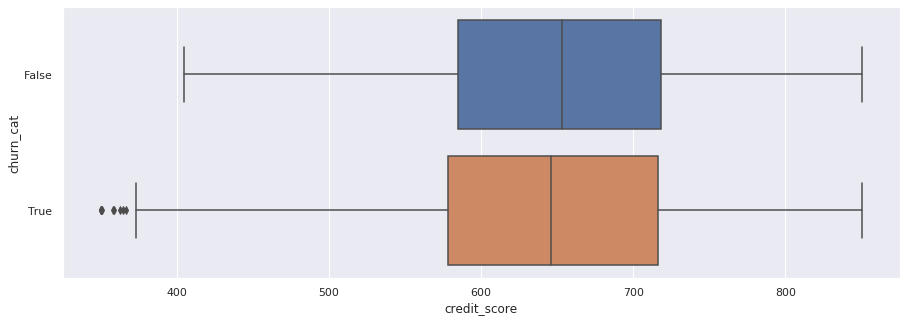

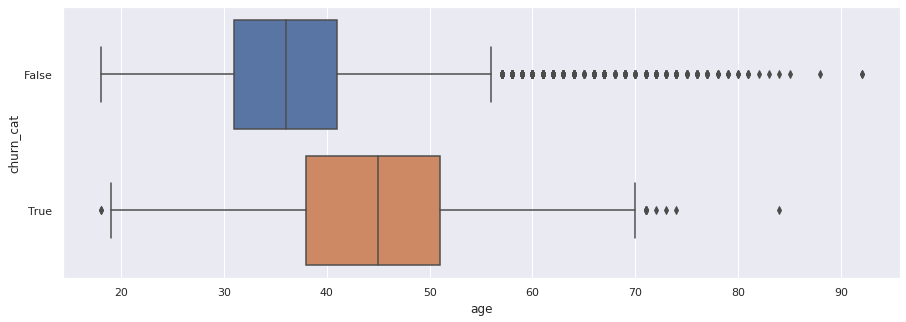

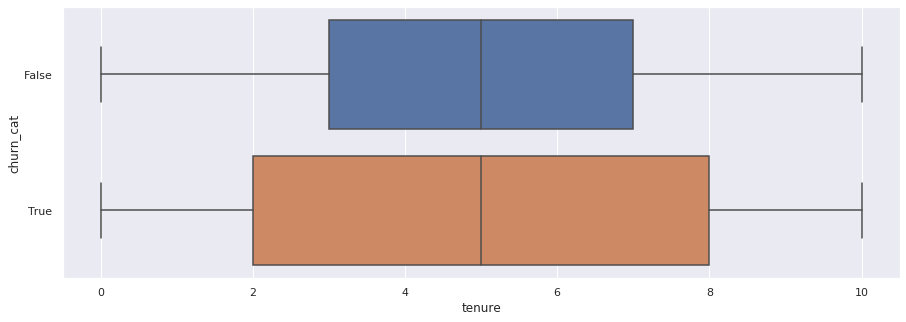

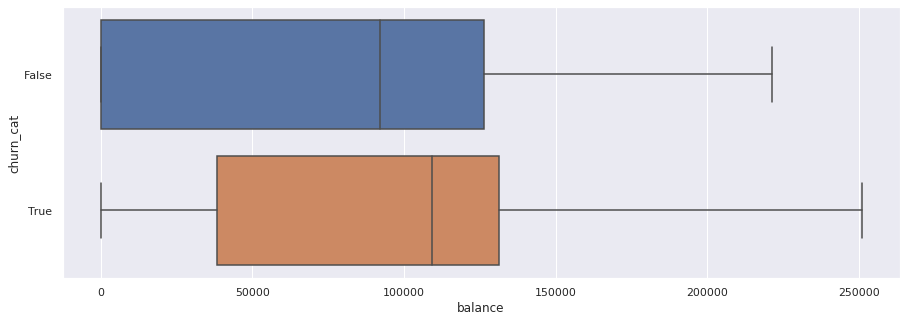

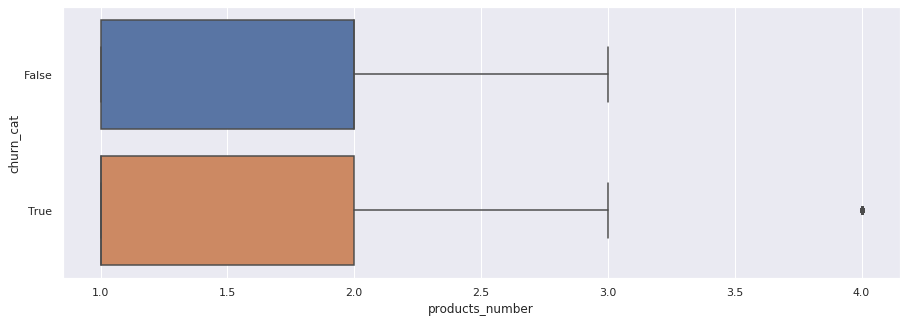

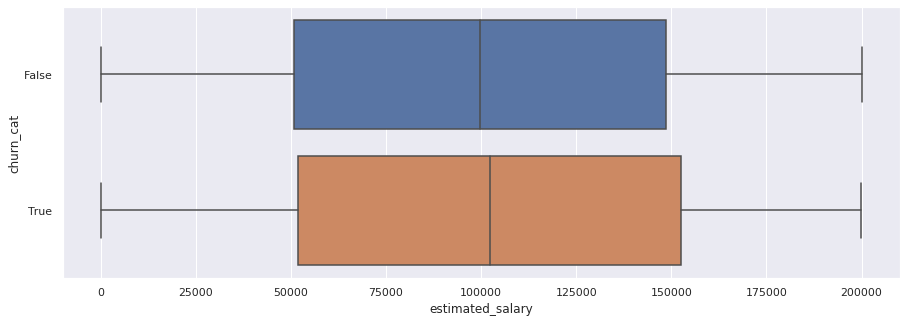

In [ ]:
#Plot by Churn Status
%matplotlib inline
temp_df = df.copy()
temp_df["churn_cat"] = temp_df["churn"].astype("category")

for col in num_vars:
  plt.figure(figsize=(15,5))
  ax = sns.boxplot(data = temp_df, x = col, y = 'churn_cat')
  plt.show()

In [ ]:
fig = px.histogram(df, x="age", y="balance", color="churn",
                   marginal="box",
                   hover_data=df.columns)
fig.show()

In [ ]:
#T-Test of Significance
for i, col in enumerate(df_num.columns):
    summary, results = rp.ttest(group1= df[col][df['churn'] == 1], 
                                group1_name= "churned",
                            group2= df[col][df['churn'] == 0], 
                            group2_name= "not churned")
    print(colored(col, 'red', attrs=['bold']))
    print(summary)
    print("\n")
    print("Two Side T Test P Value:", results.iat[3,1])
    print('\n')
    print('\n')

credit_score
      Variable        N        Mean          SD        SE   95% Conf.  \
0      churned   2037.0  645.351497  100.321503  2.222790  640.992317   
1  not churned   7963.0  651.853196   95.653837  1.071924  649.751944   
2     combined  10000.0  650.528800   96.653299  0.966533  648.634201   

     Interval  
0  649.710678  
1  653.954448  
2  652.423399  


Two Side T Test P Value: 0.0067




age
      Variable        N       Mean         SD        SE  95% Conf.   Interval
0      churned   2037.0  44.837997   9.761562  0.216284  44.413837  45.262157
1  not churned   7963.0  37.408389  10.125363  0.113468  37.185962  37.630815
2     combined  10000.0  38.921800  10.487806  0.104878  38.716218  39.127382


Two Side T Test P Value: 0.0




tenure
      Variable        N      Mean        SD        SE  95% Conf.  Interval
0      churned   2037.0  4.932744  2.936106  0.065054   4.805164  5.060324
1  not churned   7963.0  5.033279  2.880658  0.032281   4.969999  5.096559
2     com

### Dependent with Categorical Variables

In [ ]:
#Chi Square Test of Association
for i, col in enumerate(df_cat.columns):
    crosstab, test_results, expected = rp.crosstab(df["churn"], df[col],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
    print(colored(col, 'red', attrs=['bold']))
    print(test_results)
    print('\n')
    print('\n')

country
                Chi-square test   results
0  Pearson Chi-square ( 2.0) =   301.2553
1                    p-value =     0.0000
2                 Cramer's V =     0.1736




gender
                Chi-square test   results
0  Pearson Chi-square ( 1.0) =   113.4491
1                    p-value =     0.0000
2               Cramer's phi =     0.1065




credit_card
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    0.5095
1                    p-value =    0.4754
2               Cramer's phi =    0.0071




active_member
                Chi-square test   results
0  Pearson Chi-square ( 1.0) =   243.7604
1                    p-value =     0.0000
2               Cramer's phi =     0.1561




churn
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =   10000.0
1                    p-value =       0.0
2               Cramer's phi =       1.0






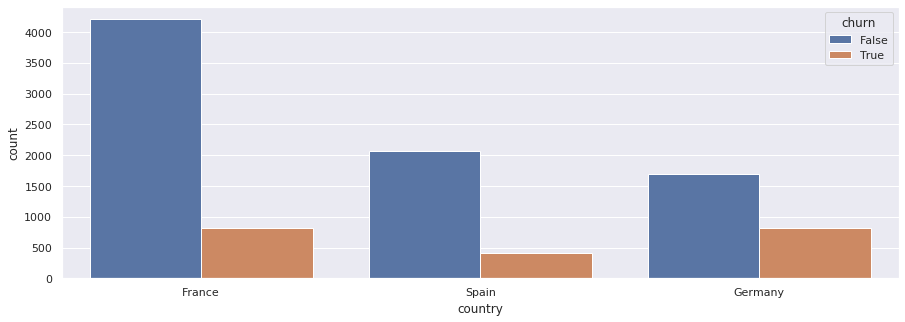

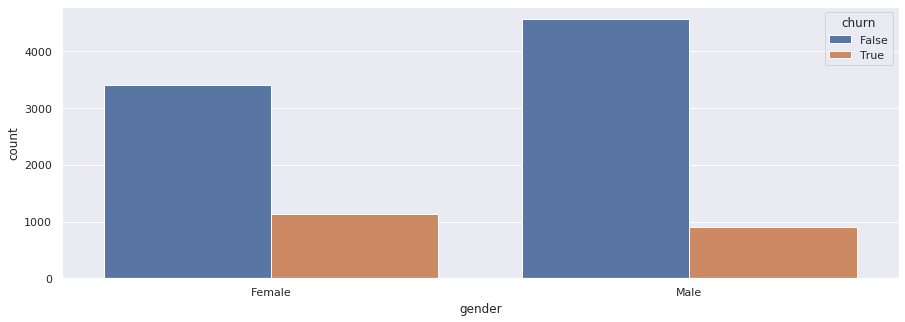

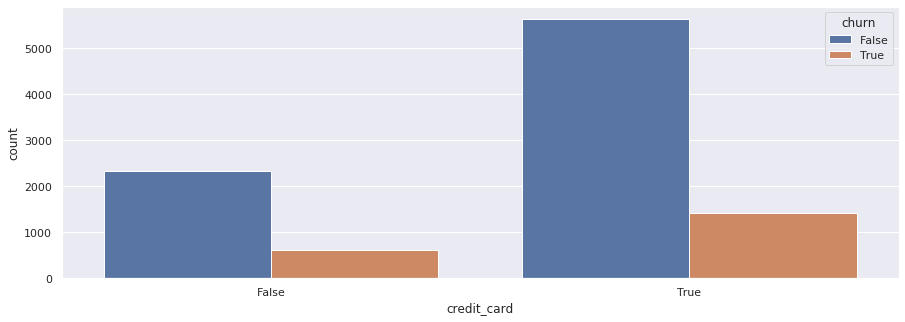

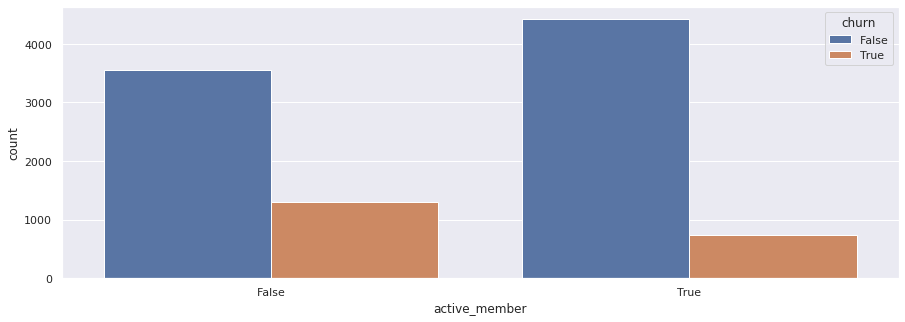

In [ ]:
#Plot Category Data by Churn
for col in cat_vars:
  plt.figure(figsize=(15,5)) 
  ax = sns.countplot(data = df, x = col, hue = 'churn')
  plt.show()

In [ ]:
#Counts by Churn
print('******************')
print('Churn Balance:')
print('******************')
print(df.churn.value_counts(dropna=False, normalize = True))
print('\n')
for col in cat_vars:
  print('******************')
  print('{} split:'.format(col))
  print('******************')
  p1 = df[(df.churn == 1)].groupby(col).size().reset_index(name='yes_counts')
  p2 = df.groupby(col).size().reset_index(name='total_counts')
  p1['total_count'] = p2['total_counts']
  p1['percent_yes'] = p1['yes_counts']/p2['total_counts']
  print(p1)
  print('\n')

******************
Churn Balance:
******************
False    0.7963
True     0.2037
Name: churn, dtype: float64


******************
country split:
******************
   country  yes_counts  total_count  percent_yes
0   France         810         5014     0.161548
1  Germany         814         2509     0.324432
2    Spain         413         2477     0.166734


******************
gender split:
******************
   gender  yes_counts  total_count  percent_yes
0  Female        1139         4543     0.250715
1    Male         898         5457     0.164559


******************
credit_card split:
******************
   credit_card  yes_counts  total_count  percent_yes
0        False         613         2945     0.208149
1         True        1424         7055     0.201843


******************
active_member split:
******************
   active_member  yes_counts  total_count  percent_yes
0          False        1302         4849     0.268509
1           True         735         5151     0.1

# Final Prep

## Categorical Encoding

In [ ]:
df = pd.get_dummies(df, columns=['country', 'gender'])
df = df.drop(columns = ['gender_Female'])

## Train, Test, Split

In [ ]:
X = df.drop(columns = ['churn']).copy()
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.65, 
                                                  random_state = 42)

## Handle Correlated Features

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = df_num.columns
vif_data["VIF"] = [variance_inflation_factor(df_num.values, i) for i in range(len(df_num.columns))]
print(vif_data)

            feature        VIF
0      credit_score  19.442916
1               age  12.020539
2            tenure   3.850015
3           balance   2.622428
4   products_number   7.658841
5  estimated_salary   3.882556


In [ ]:
df_num_filtered = df_num.drop(['credit_score', 'age'], axis=1)

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = df_num_filtered.columns
vif_data["VIF"] = [variance_inflation_factor(df_num_filtered.values, i) for i in range(len(df_num_filtered.columns))]
print(vif_data)

            feature       VIF
0            tenure  3.364134
1           balance  2.080228
2   products_number  4.090687
3  estimated_salary  3.424357


Credit score and age are highy correlated, so those will be removed for the relevant models.

In [ ]:
X_train_filtered = X_train.drop(['credit_score', 'age'], axis=1)
X_test_filtered = X_test.drop(['credit_score', 'age'], axis=1)

## Center and Scale

In [ ]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

# Modeling

## Decision Tree

## Random Forest

## KNN

## Logistic Regression

## LDA